# 1. Introdução e preparação do ambiente

In [1]:
# Instalação de uma versão mais atualizada (versão 3)
!pip install -U spacy==3.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Download de modelo pré-treinado (download do modelo grande)
!python -m spacy download 'pt_core_news_lg'

# modelo grande: pt_core_news_lg
# modelo médio: pt_core_news_md
# modelo pequeno: pt_core_news_sm

2023-06-20 21:20:45.833111: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 21:20:47.104843: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/pt_core_news_lg-3.2.0/pt_core_news_lg-3.2.0-py3-none-any.whl#egg=pt_core_news_lg==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 M

In [3]:
# Importação do modelo
import spacy

In [4]:
# Carregamento do modelo (carregamento do objeto com o modelo desejado)
nlp = spacy.load('pt_core_news_lg')

In [5]:
# Exibição do modelo criado
print(type(nlp))

<class 'spacy.lang.pt.Portuguese'>


Obs.: quando é criado um objeto do spacy, já é construído um pipeline com várias etapas. Há etapas de uso padrão (que dependem do modelo utilizado, modelo pré-treinado utilizado) e há etapas que sempre vão ocorrer. É possível personalizar o pipeline, incluindo ou excluindo etapas.

In [6]:
# Exibição do pipeline padrão
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [7]:
# Transformação de um texto em um objeto doc do sapCy
documento1 = nlp('As ações do Magazine Luiza S.A., Franca, Brasil, acumularam baixa de 70% ao ano. Assim já devolveram todos os ganhos do período da pandemia.')
documento2 = nlp("Alegações extraordinárias requerem evidências extraordinárias. Carl Sagan: 'http://carlsagan.com'")

In [8]:
# Exibindo o tamanho do vocabulário do documento
len(documento1.vocab)
len(documento2.vocab)

382

In [9]:
# Exibindo o tipo do documento
print(type(documento1))
print(type(documento2))

<class 'spacy.tokens.doc.Doc'>
<class 'spacy.tokens.doc.Doc'>


# 2. Produção de tokens

Quando o método `nlp` é chamado é criado um objeto do tipo `doc`. O objeto do tipo `doc`vai ser composto por tokens (o pipeline padrão do spaCy produz os tokens). Além disso, o objeto pode ser tratado como `spans`, que são intervalos (partes do texto que não necessariamente representam uma sentença inteira).

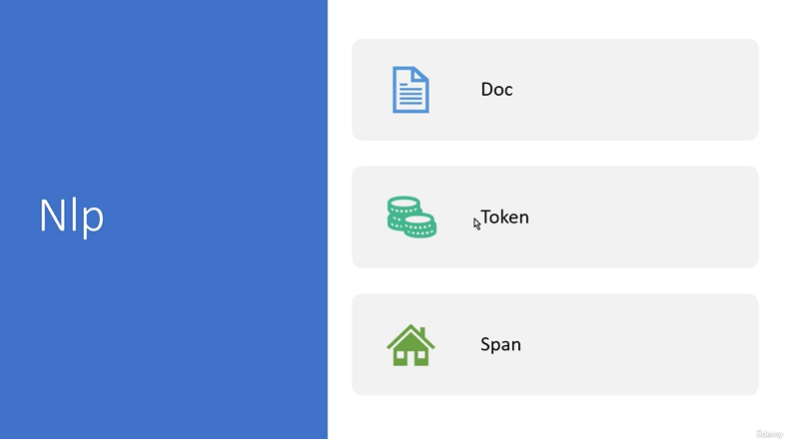

O spaCy tem uma característica de que os textos são codificados em hashes únicos. Os tokens são codificados em hashes únicos e isso fica armazenado no vocabulário. Cada um dos tokens vai ter um hash que ficará armazenado no vocabulário, ou seja, um número de identificação único e que vai ter a sua representação em texto armazenada uma única vez.

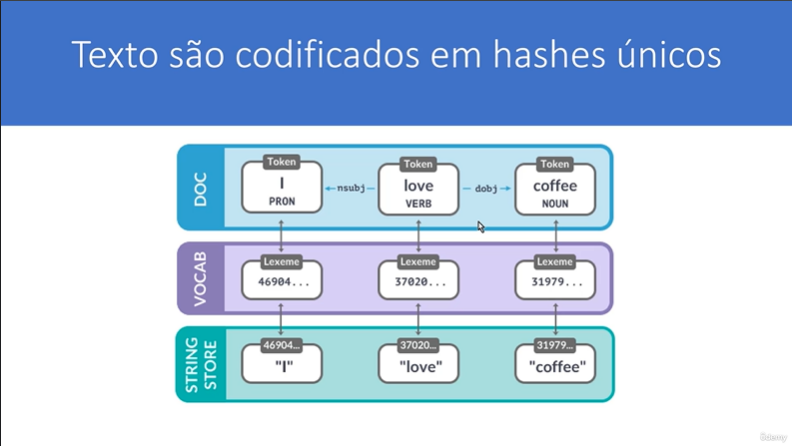

Um token é produzido automaticamente quando um pipeline no spaCy é criado. Quando ele cria um token ele não faz somente a separação dos elementos de um texto, mas pode produzir diversos atributos que estarão relacionados a esse token. Ou seja, ele pode ver se é um *stop word*, se é alfa numérico, se é pontuação, se é inicial na sentença, etc.

A criação dos tokens é a única etapa do pipeline que não é opcional (será executada sempre).

In [10]:
# Criação de tokens (tokenização do texto)
for token in documento1:
  print(token.text)

As
ações
do
Magazine
Luiza
S.A.
,
Franca
,
Brasil
,
acumularam
baixa
de
70
%
ao
ano
.
Assim
já
devolveram
todos
os
ganhos
do
período
da
pandemia
.


In [11]:
# Criação de tokens (tokenização do texto)
for token in documento2:
  print(token.text)

Alegações
extraordinárias
requerem
evidências
extraordinárias
.
Carl
Sagan
:
'
http://carlsagan.com
'


In [12]:
# Exibição de determinado token pela sua posição no documento
print(documento1[3])

Magazine


In [13]:
# Exibição de uma parte dos tokens de um documento (span)
print(documento1[3:5])

Magazine Luiza


In [14]:
# Exibição do número de tokens contidos no documento
print(len(documento1))

30


In [15]:
# Exibição de todos os tokens do documento
print('Tokens: ', [token.text for token in documento1])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']


In [16]:
# Verificação se os tokens são stop words
print('Tokens: ', [token.text for token in documento1])
print('Stop Words: ', [token.is_stop for token in documento1])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Stop Words:  [True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, True, True, False, True, False, True, False, False]


In [17]:
# Verificação se os tokens são alfanuméricos
print('Tokens: ', [token.text for token in documento1])
print('Alfanuméricos: ', [token.is_alpha for token in documento1])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Alfanuméricos:  [True, True, True, True, True, False, False, True, False, True, False, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False]


In [18]:
# Verificação se os tokens são maiúsculos
print('Tokens: ', [token.text for token in documento1])
print('Maiúsculos: ', [token.is_upper for token in documento1])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Maiúsculos:  [False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [19]:
# Verificação se os tokens são pontuações
print('Tokens: ', [token.text for token in documento1])
print('Pontuações: ', [token.is_punct for token in documento1])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Pontuações:  [False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True]


In [20]:
# Verificação se os tokens são números
print('Tokens: ', [token.text for token in documento1])
print('Números: ', [token.like_num for token in documento1])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Números:  [False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [21]:
# Verificação se os tokens são sentenças iniciais
print('Tokens: ', [token.text for token in documento1])
print('Sentenças Iniciais: ', [token.is_sent_start for token in documento1])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Sentenças Iniciais:  [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False]


In [22]:
# Exibição do formato dos tokens
print('Tokens: ', [token.text for token in documento1])
print('Formato: ', [token.shape_ for token in documento1])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Formato:  ['Xx', 'xxxx', 'xx', 'Xxxxx', 'Xxxxx', 'X.X.', ',', 'Xxxxx', ',', 'Xxxxx', ',', 'xxxx', 'xxxx', 'xx', 'dd', '%', 'xx', 'xxx', '.', 'Xxxxx', 'xx', 'xxxx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', '.']


In [23]:
# Busca de elementos numéricos e elementos que sejam pontuação
for token in documento1:
  if token.like_num:
    print('Número encontrado: ', token.text)
  if token.is_punct:
    print('Pontuação encontrada: ', token.text)

Pontuação encontrada:  ,
Pontuação encontrada:  ,
Pontuação encontrada:  ,
Número encontrado:  70
Pontuação encontrada:  %
Pontuação encontrada:  .
Pontuação encontrada:  .


# 3. Pos-Taggin e Dependências

Os 2 elementos que o spaCy pode gerar é o Part-of-speech (POS) e as dependências.
* O POS mostra que elemento é o token (mostra por meio de abreviação)
* As dependências sintáticas que existem entre diferentes tokens (mostra como um token está dependente de outro token)

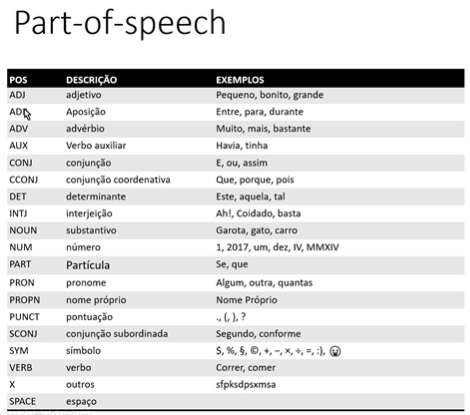

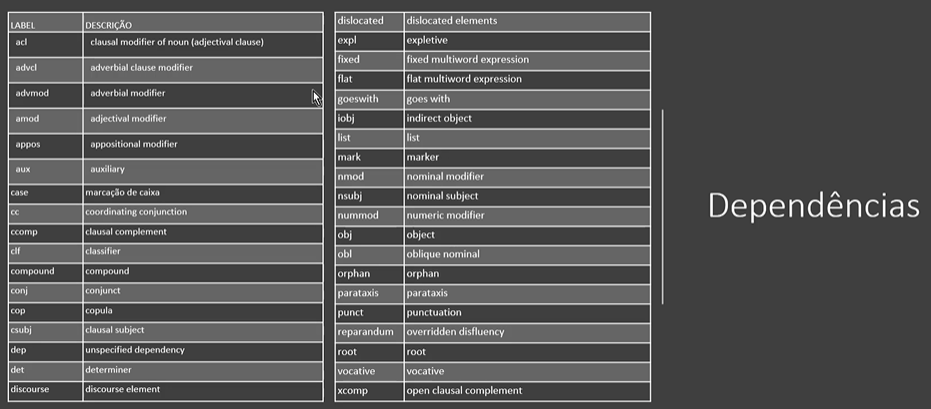

In [24]:
# Exibição do POS, das dependências, do lemma e do formato dos tokens
for token in documento1:
  print(token.text, " - ", token.pos_, " - ", token.dep_, " - ", token.lemma_, " - ", token.shape_)

As  -  DET  -  det  -  As  -  Xx
ações  -  NOUN  -  nsubj  -  ações  -  xxxx
do  -  ADP  -  case  -  do  -  xx
Magazine  -  PROPN  -  nmod  -  Magazine  -  Xxxxx
Luiza  -  PROPN  -  appos  -  Luiza  -  Xxxxx
S.A.  -  PROPN  -  flat:name  -  S.A.  -  X.X.
,  -  PUNCT  -  punct  -  ,  -  ,
Franca  -  PROPN  -  conj  -  Franca  -  Xxxxx
,  -  PUNCT  -  punct  -  ,  -  ,
Brasil  -  PROPN  -  conj  -  Brasil  -  Xxxxx
,  -  PUNCT  -  punct  -  ,  -  ,
acumularam  -  VERB  -  ROOT  -  acumular  -  xxxx
baixa  -  NOUN  -  obj  -  baixo  -  xxxx
de  -  ADP  -  case  -  de  -  xx
70  -  NUM  -  nummod  -  70  -  dd
%  -  SYM  -  nmod  -  %  -  %
ao  -  ADP  -  case  -  ao  -  xx
ano  -  NOUN  -  obl  -  ano  -  xxx
.  -  PUNCT  -  punct  -  .  -  .
Assim  -  ADV  -  advmod  -  Assim  -  Xxxxx
já  -  ADV  -  advmod  -  já  -  xx
devolveram  -  VERB  -  ROOT  -  devolver  -  xxxx
todos  -  DET  -  det  -  todo  -  xxxx
os  -  DET  -  det  -  o  -  xx
ganhos  -  NOUN  -  obj  -  ganho  -  xxxx
do 

In [25]:
# Exibição da morfologia das palavras
for token in documento1:
  print(token.text, " - ", token.morph)

As  -  Definite=Def|Gender=Fem|Number=Plur|PronType=Art
ações  -  Gender=Fem|Number=Plur
do  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
Magazine  -  Gender=Masc|Number=Sing
Luiza  -  Gender=Fem|Number=Sing
S.A.  -  Number=Sing
,  -  
Franca  -  Gender=Fem|Number=Sing
,  -  
Brasil  -  Gender=Masc|Number=Sing
,  -  
acumularam  -  Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin
baixa  -  Gender=Fem|Number=Sing
de  -  
70  -  NumType=Card
%  -  
ao  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
ano  -  Gender=Masc|Number=Sing
.  -  
Assim  -  
já  -  
devolveram  -  Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin
todos  -  Gender=Masc|Number=Plur|PronType=Tot
os  -  Definite=Def|Gender=Masc|Number=Plur|PronType=Art
ganhos  -  Gender=Masc|Number=Plur
do  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
período  -  Gender=Masc|Number=Sing
da  -  Definite=Def|Gender=Fem|Number=Sing|PronType=Art
pandemia  -  Gender=Fem|Number=Sing
.  -  


In [26]:
# Exibição de tag (POS um pouco mais sofisticado)
for token in documento1:
  print(token.text, " - ", token.tag_)

As  -  DET
ações  -  NOUN
do  -  ADP
Magazine  -  PROPN
Luiza  -  PROPN
S.A.  -  PROPN
,  -  PUNCT
Franca  -  PROPN
,  -  PUNCT
Brasil  -  PROPN
,  -  PUNCT
acumularam  -  VERB
baixa  -  NOUN
de  -  ADP
70  -  NUM
%  -  SYM
ao  -  ADP
ano  -  NOUN
.  -  PUNCT
Assim  -  ADV
já  -  ADV
devolveram  -  VERB
todos  -  DET
os  -  DET
ganhos  -  NOUN
do  -  ADP
período  -  NOUN
da  -  ADP
pandemia  -  NOUN
.  -  PUNCT


# 4. Listando Entidades Nomeadas

As entidades nomeadas são palavras ou frases específicas em um texto que se referem a entidades do mundo real, como pessoas, lugares, organizações, datas, valores monetários e outros tipos de entidades.

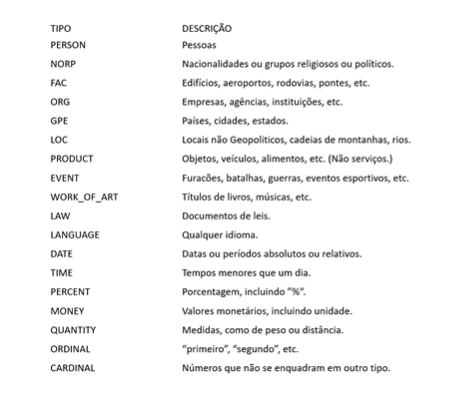

In [27]:
# Exibição de entidades nomeadas (que já se encontram no documento)
for ent in documento1.ents:
  print(ent.text, " - ", ent.label_)

Magazine Luiza S.A.  -  ORG
Franca  -  LOC
Brasil  -  LOC


É possível adicionar ao modelo outras formas de entidades nomeadas.

# 5. Gerenciamento de Stop Words

Stop Words: são palavras sem valor semântico (palavras vazias).

O spaCy possui a relação de possíveis *stop words* no idioma que se está utilizando (*stop word* é algo específico do idioma). As funcionalidades do spaCy relacionadas a *stop words* são: consultar, adicionar, checar se um token é uma stop word.

Quando o pipeline foi criado, o spaCy já identificou se o token é ou não um *stop word*.

In [28]:
# Exibição dos stop words identificados no documento
for token in documento1:
  if token.is_stop:
    print("Stop word: ", token.text)

Stop word:  As
Stop word:  do
Stop word:  de
Stop word:  ao
Stop word:  Assim
Stop word:  já
Stop word:  todos
Stop word:  os
Stop word:  do
Stop word:  da


In [29]:
# Consulta das stop words contidas no modelo do spaCy
for words in nlp.Defaults.stop_words:
  print(words)

estas
é
essas
se
tivestes
ao
tiveste
através
era
estado
bem
esses
sete
cujo
tive
apenas
máximo
outras
sim
faço
vosso
veja
estivestes
boa
números
pegar
teus
dentro
aqueles
obrigado
sempre
nada
têm
dessa
dez
pouca
sei
da
tanto
numa
falta
quarta
todo
segunda
diante
eventual
com
estar
pouco
novos
ponto
estivemos
meio
as
sob
em
onze
outros
ter
três
próxima
dezasseis
dar
seria
quando
vez
aquela
mal
vossas
exemplo
último
embora
sabe
temos
quer
fazes
dezanove
algumas
és
tem
vossos
menor
nas
vezes
tentei
oitavo
pode
seis
neste
podem
vens
todas
vão
às
questão
disso
baixo
tipo
aquele
cada
dezoito
mil
fim
estiveram
antes
inicio
vem
talvez
tempo
doze
fez
estes
cinco
cá
meus
os
ainda
está
possivelmente
estiveste
outra
fazeis
vós
naquele
tuas
primeira
estava
minhas
que
põem
maiorias
muito
porquê
grande
tu
eu
estará
me
e
porquanto
dezassete
qual
por
pois
pontos
mesmo
comprida
tal
ou
custa
fazer
diz
des
ele
dois
quatro
todos
vais
for
debaixo
nível
dizer
para
forma
oitava
querem
ontem
desta
algo
daquele

In [30]:
# Adição de nova stop word ao modelo
nlp.Defaults.stop_words.add("eita")
nlp.vocab['eita'].is_stop = True
nlp.vocab['eita'].is_stop

True

In [31]:
# Criação de uma lista com todos tokens do documento
token_lista = []
for token in documento1:
  token_lista.append(token.text)

# Criação de uma lista com todas as stop words do modelo
stop_lista = []
for words in nlp.Defaults.stop_words:
  stop_lista.append(words)

# Remoção das stop words
semstop = [word for word in token_lista if not word in stop_lista]

print(documento1.text)
print(semstop)

As ações do Magazine Luiza S.A., Franca, Brasil, acumularam baixa de 70% ao ano. Assim já devolveram todos os ganhos do período da pandemia.
['As', 'ações', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', '70', '%', 'ano', '.', 'Assim', 'devolveram', 'ganhos', 'período', 'pandemia', '.']


# 6. Vocabulário

No spaCy, cada palavra é armazenada/representada por um hash e o que é utilizado internamente pelo spaCy é o hash. Dessa forma, a palavra não é repetida, mas sempre vai apontar para uma mesma referência através de um hash.

O vocab armazena os lexemas. Um lexema é uma unidade mínima e única que possui todas as flexões de uma mesma palavra. Se uma palavra tiver diferentes flexões, então o lexema vai armazená-la de forma única na mesma flexão (sem as flexões). Diferente do token, o vocab não possui POS nem dependências. No vocab a palavra é armazenada em sua forma raiz (forma bruta).

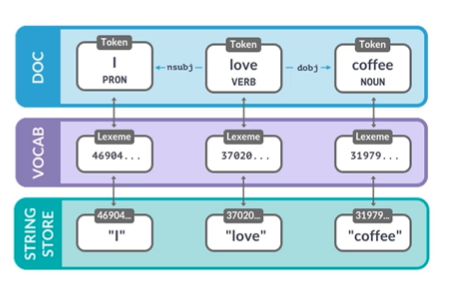

In [32]:
# Exibição do hash correspondente a determinada string
print("Hash: ", nlp.vocab.strings['dados'])
print("Hash: ", documento1.vocab.strings['dados'])

# Obs.: nlp é o objeto que foi gerado a partir do modelo baixado e o documento1 foi produzido por meio do objeto nlp

Hash:  6013848609874238634
Hash:  6013848609874238634


In [33]:
# Exibição da string correspondente a determinado hash
print("String: ", nlp.vocab.strings[6013848609874238634])

String:  dados


In [34]:
# Exibição de alguns atributos dos lexemas
# Lexemas (palavras que não dependem do contexto, ou seja não estão representadas com uma dependência de contexto)
lex = nlp.vocab['dados']
print(lex.text, " - ", lex.orth, " - ", lex.is_alpha, " - ", lex.is_lower)

# lex.orth: indica qual é o has correspondente à palavra

dados  -  6013848609874238634  -  True  -  True


In [35]:
# Exibição do vetor com pesos da relação de uma palavra com outras palavras
print(nlp("dados").vector)

# O vetor mostra os pesos da relação das palavras com outras palavras

# Exibição do formato do vetor
print(nlp("dados").vector.shape)

# vetor em questão possui 300 posições (cada posição nesse vetor vai trazer o peso da relação/semântica desta palavra com 300 outras palavras)

[-1.8078e+00 -2.8421e+00 -5.5345e-01 -4.0565e+00 -2.3565e+00  4.7295e+00
 -3.3508e+00 -1.2036e+00 -5.3749e+00 -7.5768e-01 -2.0015e+00  5.3618e+00
  2.2789e-01  1.2136e+00 -1.4418e+00 -3.0621e+00  2.2060e+00  1.1943e+00
 -1.8689e+00 -5.9128e+00 -5.1929e-01  2.1897e+00 -2.4651e+00  1.7600e+00
 -5.6308e+00  1.0053e+00  7.3080e-01  2.0417e-01 -6.0370e+00  1.7474e+00
  2.0375e+00  2.7541e+00 -1.0423e+00  1.7632e+00 -1.4484e+00 -2.4344e+00
 -8.6094e-01  1.7867e+00 -4.9920e+00 -3.1162e+00 -5.3973e-01  2.4241e+00
  4.4410e-01 -4.7503e+00  2.1383e+00  3.8537e-01 -2.2418e+00  5.8104e+00
 -1.1731e+00  2.4686e-02 -1.8413e+00 -5.9321e+00 -7.0872e-03 -2.3093e+00
  5.5101e+00 -4.1795e-01  2.9754e+00  3.6709e-01 -8.0867e-01 -1.3751e+00
  4.8132e+00 -2.2835e+00 -2.0920e-01  1.2578e+00  4.3466e+00  1.3846e+00
 -1.5847e+00  3.3322e+00 -4.3669e+00  1.8883e+00 -1.2312e+00  3.7902e-01
  8.6331e-01 -4.0607e+00 -1.3444e+00  4.5210e+00  2.2995e-01 -5.9245e+00
 -2.0598e-01 -3.1810e+00 -3.8640e+00  7.2114e+00  3

In [36]:
# Exibição do vetor com a média dos pesos da relação de uma frase com outras palavras
print(nlp("dados são uma nova forma de ver o mundo").vector)

[ 0.5255733  -1.0520301  -1.0489888   0.22808893 -2.7599888   0.91837215
 -1.6993556  -0.44524103 -2.209261   -1.2901455   0.9939946  -1.3996754
  0.7378708  -1.6957022  -1.382649   -1.1241877   2.503239    1.3766589
 -0.63682556  2.7080245  -0.6679023   0.7990059  -1.3761922   1.6491444
 -0.6950322   0.69378555 -0.19840002  1.6926199  -0.3071023   0.71506053
  0.03211441  0.27212894 -1.9055911  -1.5586021  -0.9775556   0.7999823
 -0.9553054   0.5265729  -0.87427455 -1.2073755  -2.117481    1.2241988
  1.5149522  -0.79308677 -1.1521667   0.13741441 -1.7882053   0.50415283
  1.3089666   0.06542712 -0.6260744  -1.5624356  -0.707184   -1.2425367
 -0.04237115 -0.5879791   1.7004043  -0.24798778  0.11633212 -0.55506223
  2.0148706   0.01965364  0.92778563  2.3571968  -0.49526003  1.0151839
  0.57112557  1.3510779  -0.3038622  -0.24523441 -0.42284998 -0.69732666
  0.71998227  0.2875956   0.10309222 -0.6866155   2.128672    0.9791889
 -1.4044011  -0.4600078   0.10599887  0.84635675  1.2420444

# 7. Buscando Similaridade

Distinção entre similaridade e matcher
* Similaridade: retorna um valor (métrica de similaridade). São fornecidas 2 sentenças e o spaCy retorna uma métrica informando o quão similares são as sentenças.
* Matcher: busca um padrão (semelhante à expressão regular). O spaCy retorna um padrão se encontrar.

Similaridade:
* É baseada em contexto (não na semelhança das palavras). Em outras palavras, busca uma semelhança de contexto.
* Necessita do modelo *Large* do Idioma Lemma (modelo grande: `pt_core_news_lg`)
* A métrica é o coseno, valor entre 0 e 1 (valor que mostra o quanto as sentenças são semelhantes). Quanto mais próximo de 1, mais semelhante são as sentenças.
* Utiliza representação vetorial das palavras (word embeddings) (word2vec)
* Pode ser aplicado entre Docs (entre diferentes elementos `docs`), spans e tokens.
* Não há uma relação de semântica entre as palavras.

A busca de similaridade é baseada no vetor com a média de pesos da relação de uma frase com outras palavras.

A métrica de similaridade se mantém a mesma independe da ordem das palavras.

Formas para melhorar o desempenho
* Utilização de sentenças menores (span = intervalo ou faixa de valores do documento)
* Utilização de outra função de similaridade (ex.: sense2vec)
* Remoção de *stop words*, pontuação e pronomes.

In [37]:
# Busca por similaridades entre 2 sentenças
documento3 = nlp('Ele viaja regularmente de carro')
documento4 = nlp('Ela viaja regularmente de avião')
print(documento3.similarity(documento4))

0.894174124950273


In [38]:
# Busca por similaridades entre 2 sentenças
documento3 = nlp('Ele viaja regularmente de carro')
documento4 = nlp('Ela regularmente viaja de avião')
print(documento3.similarity(documento4))

0.8941741218519844


In [39]:
# Busca por similaridade entre 2 tokens
documento5 = nlp('Devemos dizer comprimento ou cumprimento?')
tokenA = documento5[2]
tokenB = documento5[4]
print(tokenA.similarity(tokenB))

0.580434


In [40]:
# Busca por similaridade entre 2 spans
documento6 = nlp('Ele pede descrição. Ele pede discrição')
partA = documento6[0:3]
partB = documento6[4:7]
print(partA.similarity(partB))

0.96300536


# 8. Busca de Expressões com Matching

Matcher:
* É utilizado para encontrar padrões dentro de um documento, dentro de uma sentença ou dentro de um corpu.
* Possui uma forma especial de funcionamento.

Atributos de tokens que podem ser usados:

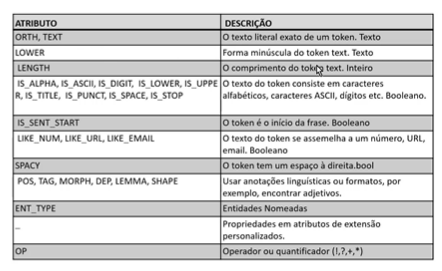

Padrões estendidos que podem ser usados:

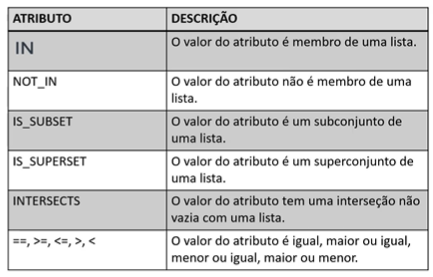

Operadores que podem ser usados:

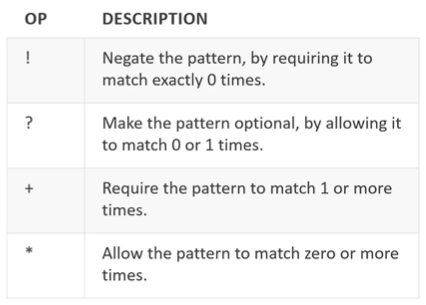

In [41]:
# Exemplo do uso de matcher
from typing import Match
from spacy.matcher import Matcher

documento7 = nlp('Você pode ligar para (51) - 9964656570 ou (11) 12344988 ')

# Inicialização
matcher = Matcher(nlp.vocab)

# Adiciona padrão para telefone "(41) - 778778877"
padrao = [{'ORTH': '('}, {'SHAPE': 'dd'}, {'ORTH': ')'}, {'ORTH': '-', 'OP': '?'}, {'IS_DIGIT': True}]

# O padrão é formado como um dicionário (atributo, valor)
# O atributo ORTH busca o texto literal exato
# O atributo SHAPE busca um formato
# O atributo OP é um operador, um qualificador
# O valor "?" indica que o operador pode receber qualquer coisa, qualquer texto
# {'IS_DIGIT': True} indica que está buscando dígitos

matcher.add('Telefone', [padrao])
matches = matcher(documento7)
for matche_id, start, end in matches:
  print(documento7[start:end])

(51) - 9964656570
(11) 12344988


In [42]:
# Exemplo do uso de matcher
documento8 = nlp('Estamos infectados com micro organismos. MICROORGANISMOS são perigosos. Não enxergamos micro-organismos.')

# Inicialização
matcher = Matcher(nlp.vocab)

# Adiciona padrão
padrao1 = [{'LOWER': 'micro-organismos'}]
padrao2 = [{'LOWER': 'microorganismos'}]
padrao3 = [{'LOWER': 'micro'}, {'LOWER': 'organismos'}]

matcher.add('padrão', [padrao1, padrao2, padrao3])
matches = matcher(documento8)
for matche_id, start, end in matches:
  print(documento8[start:end])

micro organismos
MICROORGANISMOS
micro-organismos


# 9. Visualização com Displacy

Displacy
* Módulo do spaCy para visualização
* Dois estilos principais: entidades nomeadas, dependência
* Personalizável: cor, fundo, fonte, distância, etc.

Visualização de dependências:

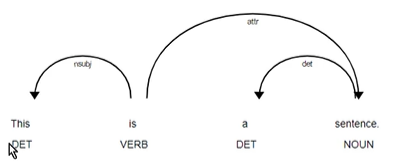

Visualização de dependências com técnicas de formatação

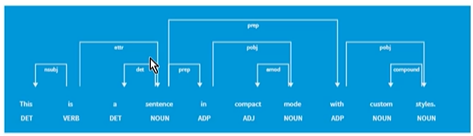

Visualização de entidades nomeadas

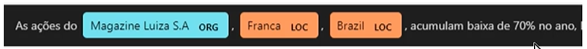

In [43]:
# Visualização de entidade nomeada
from spacy import displacy
displacy.render(documento1, style = 'ent', jupyter = True)

# "jupyter = True" indica que o display será exibido em um jupyter notebook
# "style = 'ent'" indica que a visualização é para entidades noemadas

In [44]:
# Visualização de dependências
displacy.render(documento1, style = 'dep', jupyter = True)

# "jupyter = True" indica que o display será exibido em um jupyter notebook
# "style = 'dep'" indica que a visualização é para dependência

In [45]:
# Personalização da visualização de dependências
documento1.user_data['title'] = 'Exemplo'
displacy.render(documento1, style = 'dep', jupyter = True,
                options={'compact': True, 'distance': 80, 'color': '#FFFFFF', 'bg': '#000000', 'font': 'Arial'})

# 'compact': True :: compacta a imagem
# 'distance': 80 :: determina a distância entre os elementos da imagem
# 'color': '#0000FF' :: determina a cor da visualização
# 'bg': '#000000' :: determina a cor de fundo
# 'font': 'Arial' :: determina a fonte do texto

# 10. Gerenciando Pipelines

Quando o método `nlp` é chamado, um `DOC` é criado e, consequentemente, é produzido um pipeline. Esse pipeline vai ter um processo padrão, com algumas etapas padrões, que depende do modelo utilizado. Contudo, é possível personalizar o pipeline para que ele tenha somente as etapas necessárias (removendo ou adicionando as etapas necessárias). Portanto, as etapas podem ser prontas ou personalizadas.

A primeira etapa (`tokenizer`) não é padrão. Ou seja, sempre que o método `nlp` for chamado ele vai criar o `tokenizer`. Essa etapa ocorre automaticamente sempre que o `doc` é produzido.

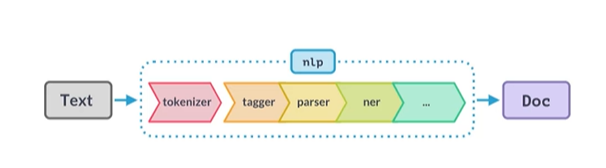

Etapas prontas no pipeline padrão do spaCy:

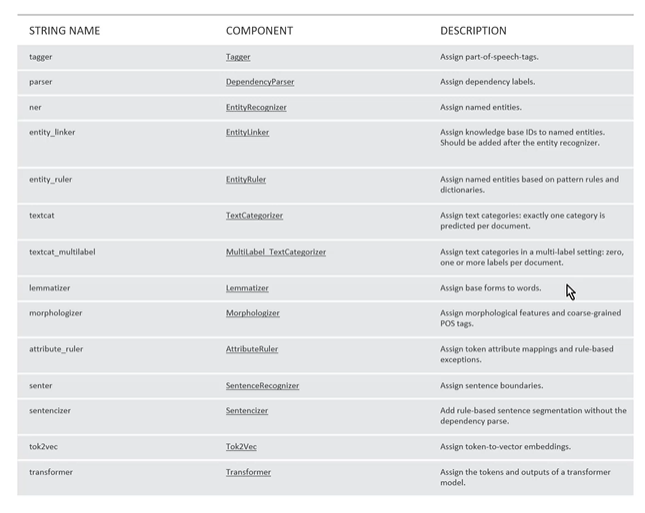

Quando o método `nlp` é chamado, ele vai criar um objeto `doc` com todo o texto pré-processado. Ou seja, vai executar todas as etapas do pipeline e vai retornar o texto.

O spaCy também possui o módulo `Pipe` (utiliza um Python Generator), que suporta multiprocessamento e tamanho de batch personalizado. Por usar um Python Generator, o `Pipe` apresenta um ganho de performance maior, pois todo o texto não será processado de uma única vez (todo o pipeline não será executado de uma única vez).
Obs.: um generator no python não processa todos os valores quando eles são criados, mas vai processar somente sob demanda (somente quando o próximo elemento da sequência for acessado).

In [46]:
# Visualização do pipeline padrão
print('Pipeline Normal: ', nlp.pipe_names)

Pipeline Normal:  ['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [47]:
# Remoção de um elemento do pipeline
nlp.remove_pipe('tok2vec')
print('Pipeline sem tok2vec: ', nlp.pipe_names)

Pipeline sem tok2vec:  ['morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


É possível criar as próprias etapas e adicioná-las a um pipeline.

In [48]:
# Adição de um elemento ao pipeline
nlp.add_pipe('tok2vec', after = 'morphologizer')
print('Pipeline com tok2vec: ', nlp.pipe_names)

# after = 'morphologizer' :: altera a ordem na qual a etapa será inserida (por default, ela entra como a última etapa do pipeline)

Pipeline com tok2vec:  ['morphologizer', 'tok2vec', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
